## <center> DETECTING SENTIMENT POLARITY IN ONLINE REVIEWS OF WOMEN'S CLOTHING</center>


In [225]:
import pandas as pd
import numpy as np
import nltk
import sklearn

In [ ]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

In [1]:
import re
import string
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pickle
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings 
warnings.filterwarnings('ignore')

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

import plotly.graph_objs as go
import cufflinks

from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from collections import Counter
import dataframe_image as dfi

In [2]:
pd.options.display.max_columns = 30
pd.set_option("display.max_colwidth", None)
sns.set_style("white")
pd.set_option("display.max_column", None)
pd.set_option("display.width", -1)
pd.set_option("display.max_rows", None)

### Dataset


In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [6]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [7]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [9]:
df.shape

(23486, 10)

In [10]:
df = df[["Review Text", "Rating"]]

In [11]:
df.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comfortable,4
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5


### Remove Missing Value


In [12]:
df.isnull().sum()

Review Text    845
Rating           0
dtype: int64

In [13]:
df = df[~df["Review Text"].isnull()]

In [14]:
df.isnull().sum()

Review Text    0
Rating         0
dtype: int64

In [15]:
df.shape

(22641, 2)

In [18]:
def rating_threshold(row):
    if row >= 4:
        return "Positive"
    if row == 3:
        return "Neutral"
    if row <= 2:
        return "Negative"

In [19]:
df["Polarity_rating"] = df["Rating"].apply(rating_threshold)

,Review Text,Rating,Polarity_rating
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive


In [20]:
df.columns = ["Review", "Rating", "Polarity_rating"]

In [ ]:
df = df.rename(columns={"Review Text": "Review"})

In [21]:
df.head()

,Review,Rating,Polarity_rating
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive


### Visualization


In [28]:
import plotly.express as px
import random

In [22]:
df_viz = df.copy()

In [24]:
df_viz["Review Length"] = df_viz["Review"].astype(str).apply(len)
df_viz["Word Count"] = df_viz["Review"].apply(lambda x: len(str(x).split()))

In [25]:
df_viz.head()

,Review,Rating,Polarity_rating,Review Length,Word Count
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive,53,8
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive,303,62
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral,500,98
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive,124,22
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive,192,36


In [26]:
color_name = {1: "#5673e0", 2: "#7597f6", 3: "#d1dae9", 4: "#f6a283", 5: "#d44e41"}

In [29]:
fig = px.histogram(
    data_frame=df_viz,
    x=df_viz["Rating"],
    y=None,
    width=500,
    height=400,
    color="Rating",
    color_discrete_map=color_name,
).update_traces(
    dict(marker_line_width=1.05, marker_line_color="black"), textfont_size=15
)
fig.update_layout(
    template="simple_white",
    title=dict(
        text="<b>DISTRIBUTION OF PRODUCT REVIEW RATING<b>",
        font=dict(size=19),
        yref="paper",
        x=0.5,
    ),
    xaxis_title=dict(text="Rating", font=dict(size=18)),
    yaxis_title=dict(text="Review Count", font=dict(size=18)),
    showlegend=False,
).update_xaxes(tickfont=dict(size=15)).update_yaxes(tickfont=dict(size=16))

In [30]:
senti_ct = (
    df_viz["Polarity_rating"]
    .value_counts()
    .rename_axis("Sentiment")
    .reset_index(name="Review Count")
)
senti_ct

,Sentiment,Review Count
0,Positive,17448
1,Neutral,2823
2,Negative,2370


In [31]:
senti_ct = (
    df_viz["Polarity_rating"]
    .value_counts()
    .rename_axis("Sentiment")
    .reset_index(name="Review Count")
)
fig = px.pie(
    senti_ct,
    values="Review Count",
    color="Sentiment",
    names="Sentiment",
    color_discrete_map={
        "Positive": "#d44e41",
        "Neutral": "#d1dae9",
        "Negative": "#5673e0",
    },
    width=500,
    height=400,
).update_traces(
    dict(marker_line_width=1, marker_line_color="black"),
    textfont_size=14,
    textinfo="percent+value",
)
fig.update_layout(
    template="simple_white",
    title=dict(
        text="<b>DISTRIBUTION OF SENTIMENT POLARITY<b>",
        font=dict(size=19),
        yref="paper",
        x=0.5,
    ),
    legend_font_size=15,
    margin=dict(l=50, r=50, t=50, b=40),
)

In [32]:
grouped2 = (
    df_viz.groupby("Rating")[["Review Length"]]
    .mean()
    .sort_values("Rating")
    .reset_index()
)
grouped2

,Rating,Review Length
0,1,304.137637
1,2,318.610071
2,3,327.425788
3,4,322.416870
4,5,298.168581


In [33]:
grouped3 = (
    df_viz.groupby("Rating")[["Word Count"]].mean().sort_values("Rating").reset_index()
)
grouped3

,Rating,Word Count
0,1,58.633374
1,2,62.056811
2,3,64.218208
3,4,63.316015
4,5,57.943062


In [37]:
color_scale = ["#5673e0", "#7597f6", "#d1dae9", "#f6a283", "#d44e41"]
bar_len = ["304.14", "318.61", "327.43", "322.42", "298.17"]

In [36]:
fig = (
    go.Figure()
    .add_trace(
        go.Bar(
            x=grouped2["Rating"],
            y=grouped2["Review Length"],
            text=bar_len,
            textposition="inside",
            marker=dict(color=grouped2["Rating"], colorscale=color_scale),
        )
    )
    .update_layout(
        autosize=False,
        width=500,
        height=400,
        template="simple_white",
        font=dict(size=15),
        title=dict(
            text="<b>AVERAGE REVIEW LENGTH BY RATING<b>",
            font=dict(size=19),
            yref="paper",
            x=0.5,
        ),
        xaxis_title=dict(text="Rating", font=dict(size=18)),
        yaxis_title=dict(text="Average Length", font=dict(size=18)),
        showlegend=False,
    )
    .update_xaxes(tickfont=dict(size=16))
    .update_yaxes(tickfont=dict(size=16))
    .update_traces(dict(marker_line_width=1.05, marker_line_color="black"))
)
fig.show()

In [38]:
bar_word = ["58.63", "62.06", "64.22", "63.32", "57.94"]

In [39]:
fig = (
    go.Figure()
    .add_trace(
        go.Bar(
            x=grouped3["Rating"],
            y=grouped3["Word Count"],
            text=bar_word,
            textposition="inside",
            marker=dict(color=grouped3["Rating"], colorscale=color_scale),
        )
    )
    .update_layout(
        autosize=False,
        width=500,
        height=400,
        template="simple_white",
        font=dict(size=15),
        title=dict(
            text="<b>AVERAGE REVIEW WORD COUNT BY RATING<b>",
            font=dict(size=19),
            yref="paper",
            x=0.5,
        ),
        xaxis_title=dict(text="Rating", font=dict(size=18)),
        yaxis_title=dict(text="Average Word Count", font=dict(size=18)),
        showlegend=False,
    )
    .update_xaxes(tickfont=dict(size=15))
    .update_yaxes(tickfont=dict(size=15))
    .update_traces(dict(marker_line_width=1.05, marker_line_color="black"))
)
fig.show()

Text(0.5, 1.0, 'DISTRIBUTION OF REVIEW LENGTH \n BASED ON SENTIMENT POLARITY')

Text(9.39496527777778, 0.5, 'Density')

Text(0.5, 9.444444444444459, 'Review Length')

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '−100'),
  Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0.0, '0'),
  Text(0, 1000.0, '1000'),
  Text(0, 2000.0, '2000'),
  Text(0, 3000.0, '3000'),
  Text(0, 4000.0, '4000'),
  Text(0, 5000.0, '5000'),
  Text(0, 6000.0, '6000')])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


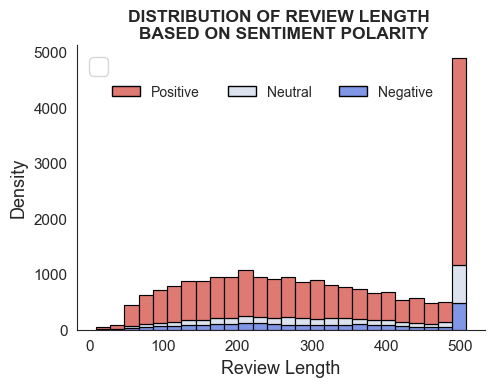

In [40]:
ax = sns.displot(
    data=df_viz,
    x="Review Length",
    hue="Polarity_rating",
    palette=["#d44e41", "#d1dae9", "#5673e0"],
    multiple="stack",
    height=4,
    edgecolor="black",
)
sns.move_legend(
    ax, "center", bbox_to_anchor=(0.55, 0.75), ncol=3, title=None, frameon=False
)
plt.title(
    "DISTRIBUTION OF REVIEW LENGTH \n BASED ON SENTIMENT POLARITY",
    y=1.0,
    fontsize=12.5,
    weight="bold",
    loc="center",
    wrap=True,
)
plt.ylabel("Density", fontsize=13)
plt.xlabel("Review Length", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize="xx-large")
plt.tight_layout()

Text(0.5, 1, 'DISTRIBUTION OF REVIEW WORD COUNT \n BASED ON SENTIMENT POLARITY')

Text(9.39496527777778, 0.5, 'Density')

Text(0.5, 9.444444444444459, 'Review Word Count')

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(-20.0, 0, '−20'),
  Text(0.0, 0, '0'),
  Text(20.0, 0, '20'),
  Text(40.0, 0, '40'),
  Text(60.0, 0, '60'),
  Text(80.0, 0, '80'),
  Text(100.0, 0, '100'),
  Text(120.0, 0, '120'),
  Text(140.0, 0, '140')])

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.,
        1800.]),
 [Text(0, 0.0, '0'),
  Text(0, 200.0, '200'),
  Text(0, 400.0, '400'),
  Text(0, 600.0, '600'),
  Text(0, 800.0, '800'),
  Text(0, 1000.0, '1000'),
  Text(0, 1200.0, '1200'),
  Text(0, 1400.0, '1400'),
  Text(0, 1600.0, '1600'),
  Text(0, 1800.0, '1800')])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


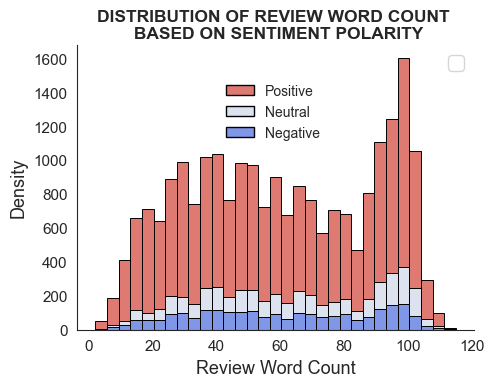

In [41]:
ax = sns.displot(
    data=df_viz,
    x="Word Count",
    hue="Polarity_rating",
    palette=["#d44e41", "#d1dae9", "#5673e0"],
    multiple="stack",
    height=4,
    edgecolor="black",
)
sns.move_legend(ax, "center", bbox_to_anchor=(0.55, 0.7), title=None, frameon=False)
plt.title(
    "DISTRIBUTION OF REVIEW WORD COUNT \n BASED ON SENTIMENT POLARITY",
    y=1,
    fontsize=12.5,
    weight="bold",
    loc="center",
    wrap=True,
)
plt.ylabel("Density", fontsize=13)
plt.xlabel("Review Word Count", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.legend(fontsize="x-large")
plt.tight_layout()

In [42]:
df_viz.head(1)

,Review,Rating,Polarity_rating,Review Length,Word Count
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive,53,8


In [43]:
rate_len = (
    df_viz.groupby("Polarity_rating")[["Review Length"]]
    .mean()
    .sort_values("Polarity_rating")
    .reset_index()
)
rate_len.columns = ["Polarity", "Length"]
rate_len

,Polarity,Length
0,Negative,313.596624
1,Neutral,327.425788
2,Positive,304.989454


In [44]:
fig = (
    px.bar(
        rate_len,
        x="Length",
        y="Polarity",
        color="Polarity",
        color_discrete_sequence=["#5673e0", "#d1dae9", "#d44e41"],
        text_auto=True,
        width=500,
        height=300,
    )
    .update_traces(
        dict(marker_line_width=0.5, marker_line_color="black"), textfont_size=15
    )
    .update_layout(
        showlegend=False,
        template="simple_white",
        title=dict(
            text="<b>AVERAGE REVIEW LENGTH BY SENTIMENT POLARITY<b>",
            font=dict(size=18),
            yref="paper",
            x=0.5,
        ),
        xaxis_title=dict(font=dict(size=17)),
        yaxis_title=dict(font=dict(size=17)),
    )
    .update_xaxes(tickfont=dict(size=16))
    .update_yaxes(tickfont=dict(size=16))
)
fig.show()

In [45]:
rate_wc = (
    df_viz.groupby("Polarity_rating")[["Word Count"]]
    .mean()
    .sort_values("Polarity_rating")
    .reset_index()
)
rate_wc.columns = ["Polarity", "Word Count"]
rate_wc

,Polarity,Word Count
0,Negative,60.870886
1,Neutral,64.218208
2,Positive,59.454436


In [46]:
fig = (
    px.bar(
        rate_wc,
        x="Word Count",
        y="Polarity",
        color="Polarity",
        color_discrete_sequence=["#5673e0", "#d1dae9", "#d44e41"],
        text_auto=True,
        width=500,
        height=300,
    )
    .update_traces(
        dict(marker_line_width=0.5, marker_line_color="black"), textfont_size=15
    )
    .update_layout(
        showlegend=False,
        template="simple_white",
        title=dict(
            text="<b>AVERAGE WORD COUNT BY SENTIMENT POLARITY<b>",
            font=dict(size=18),
            yref="paper",
            x=0.5,
        ),
        xaxis_title=dict(font=dict(size=17)),
        yaxis_title=dict(font=dict(size=17)),
    )
    .update_xaxes(tickfont=dict(size=16))
    .update_yaxes(tickfont=dict(size=16))
)
fig.show()

In [49]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(df_viz["Review"], 10)
for word, freq in common_words:
    print(word, freq)
uni_b4 = pd.DataFrame(common_words, columns=["Unigram", "Count"])

the 76166
it 49284
and 49009
is 30641
this 25762
to 24583
in 20723
but 16556
on 15328
for 14000


In [48]:
fig = (
    px.bar(
        uni_b4,
        x="Count",
        y="Unigram",
        color="Unigram",
        color_discrete_sequence=[
            "#5673e0",
            "#7597f6",
            "#94b6ff",
            "#b5cdfa",
            "#d1dae9",
            "#e8d6cc",
            "#f5c1a9",
            "#f6a283",
            "#ea7b60",
            "#d44e41",
        ],
        text_auto=True,
        width=500,
        height=400,
    )
    .update_traces(
        dict(marker_line_width=0.5, marker_line_color="black"), textfont_size=15
    )
    .update_layout(
        showlegend=False,
        template="simple_white",
        title=dict(
            text="<b>TOP 10 UNIGRAMS BEFORE REMOVING STOPWORDS<b>",
            font=dict(size=19),
            yref="paper",
            x=0.5,
        ),
        xaxis_title=dict(font=dict(size=18)),
        yaxis_title=dict(font=dict(size=18)),
    )
    .update_xaxes(tickfont=dict(size=16))
    .update_yaxes(tickfont=dict(size=16))
)
fig.show()

In [106]:
df.head()

,Review,Rating,Polarity_rating
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive


In [118]:
df_prep = df.copy()

In [119]:
df_prep.head()

,Review,Rating,Polarity_rating
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive


#### 1. Removing HTML tags and unnecessary spacing


In [133]:
def remove_tag(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace("(<a).*(>).*(</a>)", "")
    ReviewText = ReviewText.str.replace("(&amp)", "")
    ReviewText = ReviewText.str.replace("(&gt)", "")
    ReviewText = ReviewText.str.replace("(&lt)", "")
    ReviewText = ReviewText.str.replace("(\xa0)", " ")
    ReviewText = ReviewText.str.replace("\n", "")
    return ReviewText

In [137]:
df_step1 = df.copy()

In [138]:
df_step1["Review"] = remove_tag(df_step1["Review"])

In [139]:
df_step1.head()

,Review,Rating,Polarity_rating
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive


##### 2. Numbers


In [140]:
df_step2 = df_step1.copy()

In [141]:
df_step2.head()

,Review,Rating,Polarity_rating
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive


In [149]:
def remove_numbers(text):
    new_text = []
    for word in text.split():
        if not re.search("\d", word):
            new_text.append(word)
    return " ".join(new_text)


remove_numbers("Love this shirt! I'm 5'6, weigh around 135 lbs, usually a size 4.")

"Love this shirt! I'm weigh around lbs, usually a size"

In [59]:
df_step2["Review"] = df_step2["Review"].apply(remove_numbers)

In [60]:
df_step2.head()

,Review,Rating,Polarity_rating
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive


#### Expand contractions


In [61]:
import contractions
from contractions import contractions_dict

In [62]:
contractions.fix("She can't swim, I'd assume she doesn't wanna go to the beach")

'She cannot swim, I would assume she does not want to go to the beach'

In [63]:
CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have",
    "wanna": "want to",
    "gonna": "going to",
}

In [64]:
def Merge_dict(d1, d2):
    combo_dict = dict(list(d1.items()) + list(d2.items()))
    return combo_dict

In [65]:
combo_dictionary = Merge_dict(contractions_dict, CONTRACTION_MAP)

In [73]:
print(combo_dictionary)

{"I'm": 'I am', "I'm'a": 'I am about to', "I'm'o": 'I am going to', "I've": 'I have', "I'll": 'I will', "I'll've": 'I will have', "I'd": 'I would', "I'd've": 'I would have', 'Whatcha': 'What are you', "amn't": 'am not', "ain't": 'is not', "aren't": 'are not', "'cause": 'because', "can't": 'cannot', "can't've": 'cannot have', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "daren't": 'dare not', "daresn't": 'dare not', "dasn't": 'dare not', "didn't": 'did not', 'didn’t': 'did not', "don't": 'do not', 'don’t': 'do not', "doesn't": 'does not', "e'er": 'ever', "everyone's": 'everyone is', 'finna': 'fixing to', 'gimme': 'give me', "gon't": 'go not', 'gonna': 'going to', 'gotta': 'got to', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he've": 'he have', "he's": 'he is', "he'll": 'he will', "he'll've": 'he he will have', "he'd": 'he would', "he'd've": 'he would have', "here's": 'here is', "how're": 'how are',

In [66]:
def expand_di(text, contraction_mapping=combo_dictionary):
    contractions_pattern = re.compile(
        "({})".format("|".join(contraction_mapping.keys())),
        flags=re.IGNORECASE | re.DOTALL,
    )

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = (
            contraction_mapping.get(match)
            if contraction_mapping.get(match)
            else contraction_mapping.get(match.lower())
        )
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction

    try:
        expanded_text = contractions_pattern.sub(expand_match, text)
        expanded_text = re.sub("'", "", expanded_text)
    except:
        return text
    return expanded_text

In [76]:
expand_di(
    "Have y'all been to the new building yet? They aren't open on Sunday, so we can't come in I'd think"
)

'Have you all been to the new building yet? They are not open on Sunday, so we cannot come in I would think'

In [150]:
df_step3 = df_step2.copy()

In [151]:
df_step3["Review"] = df_step3["Review"].apply(expand_di)

In [152]:
df_step3.head()

,Review,Rating,Polarity_rating
0,Absolutely wonderful - silky and sexy and comfortable,4,Positive
1,"Love this dress! it is sooo pretty. i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite. i bought a petite and am 58"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,Positive
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3,Neutral
3,"I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,Positive
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,Positive


In [80]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [81]:
import dataframe_image as dfi

## VADER


In [154]:
df_step3["Review"].iloc[3]

'I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!'

In [167]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


def sentiment_scores(text):
    score = analyzer.polarity_scores(text)
    print("{:-<40} {}".format(text, str(score)))


sentiment_scores(df_step3["Review"].iloc[0])

Absolutely wonderful - silky and sexy and comfortable {'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'compound': 0.8932}


## ML Classification


In [82]:
df_ML = df_step3[["Review", "Rating"]]

In [83]:
df_ML.head()

,Review,Rating
0,Absolutely wonderful - silky and sexy and comfortable,4
1,"Love this dress! it is sooo pretty. i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite. i bought a petite and am i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3
3,"I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5


### Preprocessing Text

#### Remove punctuation + Lowercase text + Tokenization


In [212]:
def punctuation_lowercase_token(text):
    pattern = r"[^a-zA-z\s]"
    text = re.sub(pattern, "", text)
    text = text.lower()
    text_tokens = word_tokenize(text)
    return " ".join(text_tokens)


punctuation_lowercase_token(
    "Love this dress! So pretty!!! Usually a size 2 but I bought a petite! :)#@"
)

'love this dress so pretty usually a size but i bought a petite'

#### Remove stopwords


In [210]:
stopword_list = nltk.corpus.stopwords.words("english")
clothing_category = [
    "dress",
    "pant",
    "blouse",
    "knit",
    "outerwear",
    "lounge",
    "sleep",
    "wear",
    "sweater",
    "shirt",
    "skirt",
    "swim",
    "even",
    "tie",
    "jacket",
    "bottom",
    "top",
    "chemises",
    "jean",
    "leggings",
    "cardigan",
    "jumpsuit",
]
clothing_characteristic = [
    "color",
    "fabric",
    "fit",
    "look",
    "material",
    "order",
    "black",
    "white",
    "sleeve",
    "bought",
    "bit",
    "buy",
    "quality",
    "waist",
    "got",
    "length",
    "petite",
    "retailer",
    "size",
    "garment",
    "s",
    "m",
    "xs",
    "sleeveless",
    "cut",
]
clothing_stop = stopword_list + clothing_category + clothing_characteristic

In [211]:
def remove_stopwords(review):
    text_tokens = word_tokenize(review)
    text = [word.lower() for word in text_tokens if word.lower() not in clothing_stop]
    return " ".join(text)


remove_stopwords(
    "The dress is perfect, flattering cut and color, easy to wear and comfy, highly recommend"
)

'perfect , flattering , easy comfy , highly recommend'

In [209]:
import spacy

nlp = spacy.load("en_core_web_sm")


def spacy_lem(text):
    text = nlp(text)
    text = " ".join(
        [word.lemma_ if word.lemma_ != "-PRON-" else word.text for word in text]
    )
    return text


spacy_lem(
    "I had high hopes for this dress, really wanted it to work. It was so small, I'm returning this"
)

'I have high hope for this dress , really want it to work . it be so small , I be return this'

In [213]:
df_ML.head()

,Review,Rating
0,Absolutely wonderful - silky and sexy and comfortable,4
1,"Love this dress! it is sooo pretty. i happened to find it in a store, and i am glad i did bc i never would have ordered it online bc it is petite. i bought a petite and am i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5
2,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c",3
3,"I love, love, love this jumpsuit. it is fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5


In [214]:
df_ML1 = df_ML.copy()

In [215]:
df_ML1["Review"] = df_ML1["Review"].apply(punctuation_lowercase_token)
df_ML1["Review"] = df_ML1["Review"].apply(spacy_lem)
df_ML1["Review"] = df_ML1["Review"].apply(remove_stopwords)

In [216]:
df_ML1.head()

,Review,Rating
0,absolutely wonderful silky sexy comfortable,4
1,love sooo pretty happen find store glad bc never would online bc love hit little knee would definitely true midi someone truly,5
2,high hope really want work initially small usual find outrageously small small fact could zip reorder medium ok overall half comfortable nicely half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper c,3
3,love love love fun flirty fabulous every time get nothing great compliment,5
4,flattering due adjustable front perfect legging pair well love,5


In [217]:
def rating(row):
    if row >= 4:
        return "Positive"
    if row == 3:
        return "Neutral"
    if row <= 2:
        return "Negative"


df_step3["Polarity_rating"] = df_step3["Rating"].apply(rating)

In [218]:
df_ML1["Class"] = df_step3["Polarity_rating"]

In [219]:
df_ML1.head()

,Review,Rating,Class
0,absolutely wonderful silky sexy comfortable,4,Positive
1,love sooo pretty happen find store glad bc never would online bc love hit little knee would definitely true midi someone truly,5,Positive
2,high hope really want work initially small usual find outrageously small small fact could zip reorder medium ok overall half comfortable nicely half tight layer several somewhat cheap net layer imo major design flaw net layer sew directly zipper c,3,Neutral
3,love love love fun flirty fabulous every time get nothing great compliment,5,Positive
4,flattering due adjustable front perfect legging pair well love,5,Positive


In [62]:
# df_ML1.drop('Polarity_rating', inplace=True, axis=1)

### SMOTE sampling


In [220]:
from sklearn.model_selection import RepeatedStratifiedKFold
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    f1_score,
    recall_score,
    accuracy_score,
    precision_score,
)
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from numpy import where

## Building classifier


In [221]:
# from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    f1_score,
    recall_score,
    accuracy_score,
    precision_score,
)
from sklearn.model_selection import cross_val_score
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [222]:
X = df_ML1["Review"]
y = df_ML1["Class"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [105]:
mlr_bow_pipe = Pipeline(
    [
        ("vec", CountVectorizer()),
        ("smote", SMOTE(random_state=42)),
        (
            "mlr",
            LogisticRegression(
                multi_class="multinomial", solver="saga", random_state=42, max_iter=1000
            ),
        ),
    ]
)
mlr_bow = mlr_bow_pipe.fit(X_train, y_train)
y_pred = mlr_bow.predict(X_test)


mlr_bow_acc = accuracy_score(y_test, y_pred)
mlr_bow_f1 = f1_score(y_test, y_pred, average="weighted")
mlr_bow_precision = precision_score(y_test, y_pred, average="weighted")
mlr_bow_recall = recall_score(y_test, y_pred, average="weighted")
print("BASE LINE mlr/bow")
print("Accuracy: ", mlr_bow_acc, "\n")
print("F1: ", mlr_bow_f1, "\n")
print("Precision: ", mlr_bow_precision, "\n")
print("Recall: ", mlr_bow_recall, "\n")
print(classification_report(y_test, y_pred))

BASE LINE mlr/bow
Accuracy:  0.7793316649492125 

F1:  0.7870683603819925 

Precision:  0.7963466919703982 

Recall:  0.7793316649492125 

              precision    recall  f1-score   support

    Negative       0.49      0.50      0.49       711
     Neutral       0.34      0.42      0.37       847
    Positive       0.91      0.88      0.89      5235

    accuracy                           0.78      6793
   macro avg       0.58      0.60      0.59      6793
weighted avg       0.80      0.78      0.79      6793



### MLR/TF with SMOTE


In [222]:
mlr_tf_pipe = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("smote", SMOTE(random_state=42)),
        (
            "mlr",
            LogisticRegression(
                multi_class="multinomial", solver="saga", random_state=42, max_iter=1000
            ),
        ),
    ]
)
mlr_tf = mlr_tf_pipe.fit(X_train, y_train)
y_pred = mlr_tf.predict(X_test)
mlr_tf_acc = accuracy_score(y_test, y_pred)


mlr_tf_f1 = f1_score(y_test, y_pred, average="weighted")
mlr_tf_precision = precision_score(y_test, y_pred, average="weighted")
mlr_tf_recall = recall_score(y_test, y_pred, average="weighted")
print("BASE LINE mlr/TF")
print("Accuracy: ", mlr_tf_acc, "\n")
print("F1: ", mlr_tf_f1, "\n")
print("Precision: ", mlr_tf_precision, "\n")
print("Recall: ", mlr_tf_recall, "\n")
print(classification_report(y_test, y_pred))

BASE LINE mlr/TF
Accuracy:  0.7800677167672604 

F1:  0.7953359706886453 

Precision:  0.8168466115554669 

Recall:  0.7800677167672604 

              precision    recall  f1-score   support

    Negative       0.48      0.58      0.52       711
     Neutral       0.35      0.47      0.40       847
    Positive       0.94      0.86      0.90      5235

    accuracy                           0.78      6793
   macro avg       0.59      0.64      0.61      6793
weighted avg       0.82      0.78      0.80      6793



### MNB/BOW with SMOTE


In [223]:
mnb_bow_pipe = Pipeline(
    [
        ("vec", CountVectorizer()),
        ("smote", SMOTE(random_state=42)),
        ("mnb", MultinomialNB()),
    ]
)
mnb_bow = mnb_bow_pipe.fit(X_train, y_train)
y_pred = mnb_bow.predict(X_test)


mnb_bow_acc = accuracy_score(y_test, y_pred)
mnb_bow_f1 = f1_score(y_test, y_pred, average="weighted")
mnb_bow_precision = precision_score(y_test, y_pred, average="weighted")
mnb_bow_recall = recall_score(y_test, y_pred, average="weighted")
print("BASE LINE MNB/bow")
print("Accuracy: ", mnb_bow_acc, "\n")
print("F1: ", mnb_bow_f1, "\n")
print("Precision: ", mnb_bow_precision, "\n")
print("Recall: ", mnb_bow_recall, "\n")
print(classification_report(y_test, y_pred))

BASE LINE MNB/bow
Accuracy:  0.799646695127337 

F1:  0.8021845513723376 

Precision:  0.807153496844256 

Recall:  0.799646695127337 

              precision    recall  f1-score   support

    Negative       0.59      0.47      0.52       711
     Neutral       0.36      0.43      0.39       847
    Positive       0.91      0.90      0.91      5235

    accuracy                           0.80      6793
   macro avg       0.62      0.60      0.61      6793
weighted avg       0.81      0.80      0.80      6793



### MNB/TF with SMOTE


In [224]:
mnb_tf_pipe = Pipeline(
    [
        ("tfidf", TfidfVectorizer()),
        ("smote", SMOTE(random_state=42)),
        ("mnb", MultinomialNB()),
    ]
)
mnb_tf = mnb_tf_pipe.fit(X_train, y_train)
y_pred = mnb_tf.predict(X_test)


mnb_tf_acc = accuracy_score(y_test, y_pred)
mnb_tf_f1 = f1_score(y_test, y_pred, average="weighted")
mnb_tf_precision = precision_score(y_test, y_pred, average="weighted")
mnb_tf_recall = recall_score(y_test, y_pred, average="weighted")
print("BASE LINE MNB/TF")
print("Accuracy: ", mnb_tf_acc, "\n")
print("F1: ", mnb_tf_f1, "\n")
print("Precision: ", mnb_tf_precision, "\n")
print("Recall: ", mnb_tf_recall, "\n")
print(classification_report(y_test, y_pred))

BASE LINE MNB/TF
Accuracy:  0.7481230678639776 

F1:  0.7751082514130782 

Precision:  0.8200057260600958 

Recall:  0.7481230678639776 

              precision    recall  f1-score   support

    Negative       0.47      0.55      0.51       711
     Neutral       0.30      0.54      0.39       847
    Positive       0.95      0.81      0.87      5235

    accuracy                           0.75      6793
   macro avg       0.57      0.63      0.59      6793
weighted avg       0.82      0.75      0.78      6793



## Comparision of Baseline models


In [225]:
compare_base = pd.DataFrame(
    {
        "Baseline model": ["MLR/BOW", "MLR/TF-IDF", "MNB/BOW", "MNB/TF-IDF"],
        "Accuracy": [mlr_bow_acc, mlr_tf_acc, mnb_bow_acc, mnb_tf_acc],
        "Precision": [
            mlr_bow_precision,
            mlr_tf_precision,
            mnb_bow_precision,
            mnb_tf_precision,
        ],
        "Recall": [mlr_bow_recall, mlr_tf_recall, mnb_bow_recall, mnb_tf_recall],
        "F1": [mlr_bow_f1, mlr_tf_f1, mnb_bow_f1, mnb_tf_f1],
    }
)

In [226]:
compare_base

,Baseline model,Accuracy,Precision,Recall,F1
0,MLR/BOW,0.779332,0.796347,0.779332,0.787068
1,MLR/TF-IDF,0.780068,0.816847,0.780068,0.795336
2,MNB/BOW,0.799647,0.807153,0.799647,0.802185
3,MNB/TF-IDF,0.748123,0.820006,0.748123,0.775108


In [227]:
compare_base2 = compare_base.sort_values(by=["F1"], ascending=False)
compare_base2

,Baseline model,Accuracy,Precision,Recall,F1
2,MNB/BOW,0.799647,0.807153,0.799647,0.802185
1,MLR/TF-IDF,0.780068,0.816847,0.780068,0.795336
0,MLR/BOW,0.779332,0.796347,0.779332,0.787068
3,MNB/TF-IDF,0.748123,0.820006,0.748123,0.775108


In [77]:
dfi.export(compare_base2, "compare_base.png", fontsize=16, dpi=400)

/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


## Evaluating

### <font color="yellow"><b>Cross Validation Scores</b></font>


In [224]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [230]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#### MLR/BOW - CV


In [231]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mlr_bow_cv_acc = cross_val_score(
    mlr_bow, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1
)
mlr_bow_cv_mean_acc = np.mean(mlr_bow_cv_acc)
print("CV Accuracy:", mlr_bow_cv_acc)
print("Mean CV Accuracy:", mlr_bow_cv_mean_acc)
print("Test Accuracy:", mlr_bow_acc)

CV Accuracy: [0.77507886 0.75962145 0.7659306  0.76080783 0.76459451]
Mean CV Accuracy: 0.7652066499895975
Test Accuracy: 0.7793316649492125


In [232]:
mlr_bow_cv_f1 = cross_val_score(
    mlr_bow, X_train, y_train, cv=cv, scoring="f1_weighted", n_jobs=-1
)
mlr_bow_cv_mean_f1 = np.mean(mlr_bow_cv_f1)
print("CV F1:", mlr_bow_cv_f1)
print("Mean CV F1:", mlr_bow_cv_mean_f1)
print("Test F1:", mlr_bow_f1)

CV F1: [0.77973981 0.76727539 0.77109952 0.76980023 0.77340209]
Mean CV F1: 0.772263406694941
Test F1: 0.7870683603819925


#### MLR/TF - CV


In [233]:
mlr_tf_cv_acc = cross_val_score(
    mlr_tf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1
)
mlr_tf_cv_mean_acc = np.mean(mlr_tf_cv_acc)
print("CV Accuracy:", mlr_tf_cv_acc)
print("Mean CV Accuracy:", mlr_tf_cv_mean_acc)
print("Test Accuracy:", mlr_tf_acc)

CV Accuracy: [0.79432177 0.77287066 0.78107256 0.77595456 0.77090565]
Mean CV Accuracy: 0.7790250384989443
Test Accuracy: 0.7800677167672604


In [234]:
mlr_tf_cv_f1 = cross_val_score(
    mlr_tf, X_train, y_train, cv=cv, scoring="f1_weighted", n_jobs=-1
)
mlr_tf_cv_mean_f1 = np.mean(mlr_tf_cv_f1)
print("CV F1:", mlr_tf_cv_f1)
print("Mean CV F1:", mlr_tf_cv_mean_f1)
print("Test F1:", mlr_tf_f1)

CV F1: [0.80601136 0.78599322 0.79396597 0.78967848 0.78630052]
Mean CV F1: 0.7923899085835091
Test F1: 0.7953359706886453


### MNB/BoW


In [235]:
mnb_bow_cv_acc = cross_val_score(
    mnb_bow, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1
)
mnb_bow_cv_mean_acc = np.mean(mnb_bow_cv_acc)
print("CV Accuracy:", mnb_bow_cv_acc)
print("Mean CV Accuracy:", mnb_bow_cv_mean_acc)
print("Test Accuracy:", mnb_bow_acc)

CV Accuracy: [0.80820189 0.7955836  0.79116719 0.79110129 0.79047018]
Mean CV Accuracy: 0.7953048310078014
Test Accuracy: 0.799646695127337


In [237]:
mnb_bow_cv_f1 = cross_val_score(
    mnb_bow, X_train, y_train, cv=cv, scoring="f1_weighted", n_jobs=-1
)
mnb_bow_cv_mean_f1 = np.mean(mnb_bow_cv_f1)
print("CV F1:", mnb_bow_cv_f1)
print("Mean CV F1:", mnb_bow_cv_mean_f1)
print("Test F1:", mnb_bow_f1)

CV F1: [0.80645246 0.79452614 0.7901689  0.79028538 0.79380139]
Mean CV F1: 0.795046852746877
Test F1: 0.8021845513723376


### MNB/TF


In [238]:
mnb_tf_cv_acc = cross_val_score(
    mnb_tf, X_train, y_train, cv=cv, scoring="accuracy", n_jobs=-1
)
mnb_tf_cv_mean_acc = np.mean(mnb_tf_cv_acc)
print("CV Accuracy:", mnb_tf_cv_acc)
print("Mean CV Accuracy:", mnb_tf_cv_mean_acc)
print("Test Accuracy:", mnb_tf_acc)

CV Accuracy: [0.76687697 0.7488959  0.73280757 0.73303881 0.73051436]
Mean CV Accuracy: 0.7424267225975614
Test Accuracy: 0.7481230678639776


In [239]:
mnb_tf_cv_f1 = cross_val_score(
    mnb_tf, X_train, y_train, cv=cv, scoring="f1_weighted", n_jobs=-1
)
mnb_tf_cv_mean_f1 = np.mean(mnb_tf_cv_f1)
print("CV F1:", mnb_tf_cv_f1)
print("Mean CV F1:", mnb_tf_cv_mean_f1)
print("Test F1:", mnb_tf_f1)

CV F1: [0.78949924 0.77343147 0.76048335 0.76122242 0.76096813]
Mean CV F1: 0.7691209217859807
Test F1: 0.7751082514130782


### Compare cross_val_score


In [240]:
cv_table = pd.DataFrame(
    {
        "Model": ["MNB/BOW", "MNB/TF-IDF", "MLR/BOW", "MLR/TF-IDF"],
        "Mean CV Accuracy": [
            mnb_bow_cv_mean_acc,
            mnb_tf_cv_mean_acc,
            mlr_bow_cv_mean_acc,
            mlr_tf_cv_mean_acc,
        ],
        "Test Accuracy": [mnb_bow_acc, mnb_tf_acc, mlr_bow_acc, mlr_tf_acc],
        "Mean CV F1": [
            mnb_bow_cv_mean_f1,
            mnb_tf_cv_mean_f1,
            mlr_bow_cv_mean_f1,
            mlr_tf_cv_mean_f1,
        ],
        "Test F1": [mnb_bow_f1, mnb_tf_f1, mlr_bow_f1, mlr_tf_f1],
    }
)
cv_table

,Model,Mean CV Accuracy,Test Accuracy,Mean CV F1,Test F1
0,MNB/BOW,0.795305,0.799647,0.795047,0.802185
1,MNB/TF-IDF,0.742427,0.748123,0.769121,0.775108
2,MLR/BOW,0.765207,0.779332,0.772263,0.787068
3,MLR/TF-IDF,0.779025,0.780068,0.792390,0.795336


In [243]:
cv_table2 = cv_table.sort_values(by="Mean CV F1", ascending=False)
cv_table2

,Model,Mean CV Accuracy,Test Accuracy,Mean CV F1,Test F1
0,MNB/BOW,0.795305,0.799647,0.795047,0.802185
3,MLR/TF-IDF,0.779025,0.780068,0.792390,0.795336
2,MLR/BOW,0.765207,0.779332,0.772263,0.787068
1,MNB/TF-IDF,0.742427,0.748123,0.769121,0.775108


In [90]:
dfi.export(cv_table2, "cv_table2.png", fontsize=16, dpi=400)

/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


### <font color="yellow"><b>Model Tuning</b></font>


In [91]:
# Tuning our Multinomial Naïve Bayes model
from sklearn.model_selection import GridSearchCV

In [92]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## TUNING MNB - TF


#### Grid search


In [244]:
best_list = []

In [245]:
def grid(name, model, params):
    name = input()
    model_grid = GridSearchCV(
        model, param_grid=params, scoring="f1_weighted", cv=cv, n_jobs=-1, verbose=2
    )
    # FIT GRID SEARCH
    model_grid_fit = model_grid.fit(X_train, y_train)
    model_best = model_grid_fit.best_params_
    best_list.append(model_best)

    # RESULTS
    model_results = model_grid_fit.cv_results_
    model_results_df = pd.DataFrame(
        {
            "Rank": model_results["rank_test_score"],
            "Hyperparameter": model_results["params"],
            "CV F1 score (mean)": model_results["mean_test_score"],
        }
    )
    model_results_df = model_results_df.sort_values(by=["Rank"], ascending=True)

    # STYLE TABLE
    styles = [
        dict(selector="caption", props=[("font-size", "120%"), ("font-weight", "bold")])
    ]
    model_results_df = model_results_df.style.set_caption(name).set_table_styles(styles)

    # OUTPUT
    print("Best hyperparameter: ", model_best)
    display(model_results_df)
    dfi.export(model_results_df, "model_results_df.png", fontsize=16, dpi=400)

In [247]:
mnb_tf_pipe

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('mnb', MultinomialNB())])

In [248]:
mnb_tf_param = {
    "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "mnb__alpha": [1e-5, 1e-4, 1e-2, 1e-1, 1],
}

In [249]:
grid("MNB/TF-IDF", mnb_tf_pipe, mnb_tf_param)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 1); total time=   2.9s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 1); total time=   3.0s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 1); total time=   3.1s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 1); total time=   3.2s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 1); total time=   2.8s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 2); total time=   7.7s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 2); total time=   7.7s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 2); total time=   7.7s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 2); total time=   7.2s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 2); total time=   4.9s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_range=(1, 3); total time=  10.9s
[CV] END ........mnb__alpha=1e-05, tfidf__ngram_

,Rank,Hyperparameter,CV F1 score (mean)
10,1,"{'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}",0.797549
11,2,"{'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 3)}",0.795855
13,3,"{'mnb__alpha': 1, 'tfidf__ngram_range': (1, 2)}",0.781883
14,4,"{'mnb__alpha': 1, 'tfidf__ngram_range': (1, 3)}",0.776328
8,5,"{'mnb__alpha': 0.01, 'tfidf__ngram_range': (1, 3)}",0.770570
7,6,"{'mnb__alpha': 0.01, 'tfidf__ngram_range': (1, 2)}",0.769738
12,7,"{'mnb__alpha': 1, 'tfidf__ngram_range': (1, 1)}",0.769121
9,8,"{'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 1)}",0.766728
6,9,"{'mnb__alpha': 0.01, 'tfidf__ngram_range': (1, 1)}",0.759344
3,10,"{'mnb__alpha': 0.0001, 'tfidf__ngram_range': (1, 1)}",0.745745


/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


In [250]:
mnb_tf_best = best_list[0]
print("MNB/TF: ", mnb_tf_best)

MNB/TF:  {'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}


### TUNED MNB/TF


In [251]:
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

In [252]:
def tuning_result(name, model_pl):
    name = input()
    model = model_pl.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(model_acc)
    #### METRICS
    model_f1 = f1_score(y_test, y_pred, average="weighted")
    f1_list.append(model_f1)

    model_precision = precision_score(y_test, y_pred, average="weighted")
    precision_list.append(model_precision)

    model_recall = recall_score(y_test, y_pred, average="weighted")
    recall_list.append(model_recall)
    #### OUTPUT
    print("Accuracy: ", model_acc, "\n")
    print("F1: ", model_f1, "\n")
    print("Precision: ", model_precision, "\n")
    print("Recall: ", model_recall, "\n")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    #### VISUALIZATION
    ########## CLF REPORT ###############################
    model_clf = classification_report(
        y_test,
        y_pred,
        # labels=labels,
        # target_names=target_names,
        output_dict=True,
    )
    plt.figure()
    fig, ax = plt.subplots(figsize=(5, 4))
    xticks = ["Precision", "Recall", "F1-score"]
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    sns.heatmap(
        pd.DataFrame(model_clf).iloc[:-1, :].T,
        annot=True,
        annot_kws={"size": 14},
        cbar=False,
        cmap="coolwarm",
        linewidths=0.7,
        linecolor="white",
        xticklabels=xticks,
    )
    plt.tight_layout()
    plt.title(
        "CLASSIFICATION REPORT OF TUNED " + name,
        y=1.05,
        fontsize=13,
        weight="bold",
        loc="center",
        wrap=True,
    )

    ########## CONFUSION MATRIX ###############################
    classes = ["Negative", "Neutral", "Positive"]
    model_cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(5, 4))
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    sns.heatmap(
        pd.DataFrame(model_cm),
        annot=True,
        annot_kws={"size": 14},
        fmt="g",
        cmap="coolwarm",
        linewidths=1,
        linecolor="white",
        cbar=False,
    )
    plt.tight_layout()
    plt.title(
        "CONFUSION MATRIX OF TUNED " + name,
        y=1.05,
        fontsize=13,
        weight="bold",
        loc="center",
        wrap=True,
    )
    plt.ylabel("Actual label", fontsize=13)
    plt.xlabel("Predicted label", fontsize=13)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

In [253]:
mnb_tf2_pipe = Pipeline(
    [
        ("tfidf", TfidfVectorizer(ngram_range=(1, 2))),
        ("smote", SMOTE(random_state=42)),
        ("mnb", MultinomialNB(alpha=0.1)),
    ]
)

Accuracy:  0.7962608567643162 

F1:  0.7970705938060809 

Precision:  0.7983726118344099 

Recall:  0.7962608567643162 

              precision    recall  f1-score   support

    Negative       0.48      0.43      0.45       711
     Neutral       0.36      0.40      0.38       847
    Positive       0.91      0.91      0.91      5235

    accuracy                           0.80      6793
   macro avg       0.58      0.58      0.58      6793
weighted avg       0.80      0.80      0.80      6793

[[ 305  258  148]
 [ 197  339  311]
 [ 136  334 4765]]


<Figure size 1000x600 with 0 Axes>

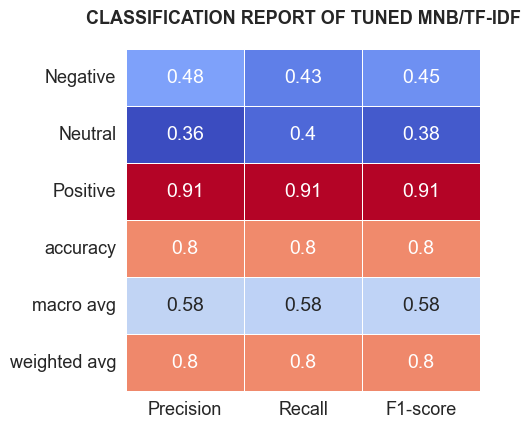

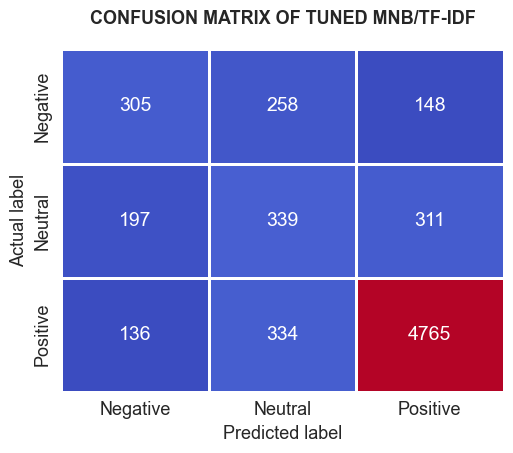

In [254]:
tuning_result("MNB/TF-IDF", mnb_tf2_pipe)

In [255]:
mnb_tf2_acc = accuracy_list[0]
mnb_tf2_f1 = f1_list[0]
mnb_tf2_precision = precision_list[0]
mnb_tf2_recall = recall_list[0]

In [256]:
print("MNB/TF-IDF: ", mnb_tf2_acc, mnb_tf2_f1, mnb_tf2_precision, mnb_tf2_recall)

MNB/TF-IDF:  0.7962608567643162 0.7970705938060809 0.7983726118344099 0.7962608567643162


In [257]:
print(accuracy_list)
print(f1_list)
print(precision_list)
print(recall_list)

[0.7962608567643162]
[0.7970705938060809]
[0.7983726118344099]
[0.7962608567643162]


### TUNED MNB - BoW


In [258]:
mnb_bow_pipe

Pipeline(steps=[('vec', CountVectorizer()), ('smote', SMOTE(random_state=42)),
                ('mnb', MultinomialNB())])

In [259]:
mnb_bow_params = {
    "mnb__alpha": [1e-5, 1e-4, 1e-2, 1e-1, 1],
    "vec__ngram_range": [(1, 1), (1, 2), (1, 3)],
}

In [260]:
grid("MNB/BOW", mnb_bow_pipe, mnb_bow_params)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 1); total time=   4.3s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 1); total time=   4.3s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 1); total time=   4.3s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 1); total time=   4.3s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 1); total time=   2.7s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 2); total time=   5.2s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 2); total time=   5.2s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 2); total time=   5.2s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 2); total time=   4.3s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 2); total time=   5.6s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_range=(1, 3); total time=   9.7s
[CV] END ..........mnb__alpha=1e-05, vec__ngram_

,Rank,Hyperparameter,CV F1 score (mean)
10,1,"{'mnb__alpha': 0.1, 'vec__ngram_range': (1, 2)}",0.802853
11,2,"{'mnb__alpha': 0.1, 'vec__ngram_range': (1, 3)}",0.798414
12,3,"{'mnb__alpha': 1, 'vec__ngram_range': (1, 1)}",0.795047
9,4,"{'mnb__alpha': 0.1, 'vec__ngram_range': (1, 1)}",0.786051
7,5,"{'mnb__alpha': 0.01, 'vec__ngram_range': (1, 2)}",0.785533
8,6,"{'mnb__alpha': 0.01, 'vec__ngram_range': (1, 3)}",0.783731
6,7,"{'mnb__alpha': 0.01, 'vec__ngram_range': (1, 1)}",0.777210
3,8,"{'mnb__alpha': 0.0001, 'vec__ngram_range': (1, 1)}",0.764641
0,9,"{'mnb__alpha': 1e-05, 'vec__ngram_range': (1, 1)}",0.760600
5,10,"{'mnb__alpha': 0.0001, 'vec__ngram_range': (1, 3)}",0.752762


/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


In [261]:
mnb_bow_best = best_list[1]
print("MNB/BOW: ", mnb_tf_best)

MNB/BOW:  {'mnb__alpha': 0.1, 'tfidf__ngram_range': (1, 2)}


In [262]:
mnb_bow2_pipe = Pipeline(
    [
        ("vec", CountVectorizer(ngram_range=(1, 2))),
        ("smote", SMOTE(random_state=42)),
        ("mnb", MultinomialNB(alpha=0.1)),
    ]
)

Accuracy:  0.8014132194906521 

F1:  0.8047588034382205 

Precision:  0.8093474791365665 

Recall:  0.8014132194906521 

              precision    recall  f1-score   support

    Negative       0.50      0.44      0.47       711
     Neutral       0.37      0.44      0.40       847
    Positive       0.92      0.91      0.91      5235

    accuracy                           0.80      6793
   macro avg       0.60      0.60      0.60      6793
weighted avg       0.81      0.80      0.80      6793

[[ 315  269  127]
 [ 196  375  276]
 [ 116  365 4754]]


<Figure size 1000x600 with 0 Axes>

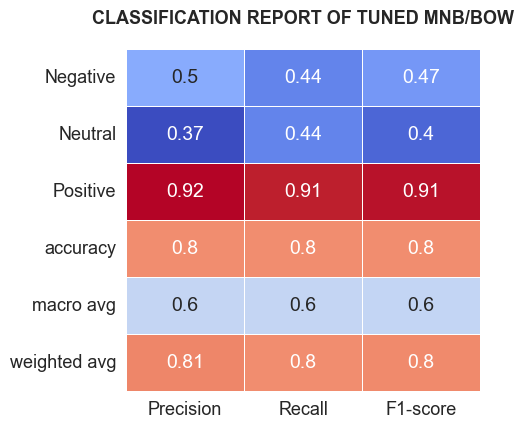

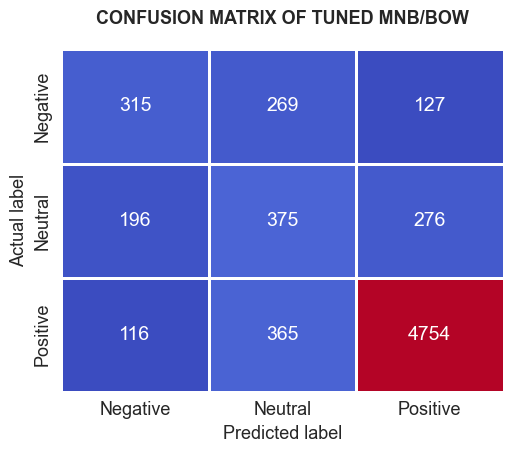

In [263]:
tuning_result("MNB/BOW", mnb_bow2_pipe)

In [264]:
accuracy_list
f1_list
precision_list
recall_list

[0.7962608567643162, 0.8014132194906521]

[0.7970705938060809, 0.8047588034382205]

[0.7983726118344099, 0.8093474791365665]

[0.7962608567643162, 0.8014132194906521]

In [265]:
mnb_bow2_acc = accuracy_list[1]
mnb_bow2_f1 = f1_list[1]
mnb_bow2_precision = precision_list[1]
mnb_bow2_recall = recall_list[1]
print("MNB/BOW: ", mnb_bow2_acc, mnb_bow2_f1, mnb_bow2_precision, mnb_bow2_recall)

MNB/BOW:  0.8014132194906521 0.8047588034382205 0.8093474791365665 0.8014132194906521


### TUNING MLR - TF


In [266]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn_evaluation import plot
from yellowbrick.classifier import ClassificationReport

In [267]:
mlr_tf_pipe

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('smote', SMOTE(random_state=42)),
                ('mlr',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=42, solver='saga'))])

In [268]:
mlr_tf_params = {
    "tfidf__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "mlr__C": [1.0, 0.1, 0.01, 10],
    "mlr__penalty": ["l1", "l2"],
}

In [269]:
grid("MLR/TF-IDF", mlr_tf_pipe, mlr_tf_params)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 1); total time=   5.5s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 1); total time=   5.6s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 1); total time=   5.6s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 1); total time=   5.8s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 1); total time=   6.2s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 2); total time=  17.2s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 2); total time=  17.9s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 2); total time=  18.3s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 2); total time=  16.5s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 2); total time=  32.4s
[CV] END mlr__C=1.0, mlr__penalty=l2, tfidf__ngram_range=(1, 3); total time=  56.8s
[CV] END mlr__C

,Rank,Hyperparameter,CV F1 score (mean)
11,1,"{'mlr__C': 10, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 3)}",0.814119
1,2,"{'mlr__C': 1.0, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 2)}",0.811255
10,3,"{'mlr__C': 10, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 2)}",0.810873
2,4,"{'mlr__C': 1.0, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 3)}",0.809863
4,5,"{'mlr__C': 0.1, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 2)}",0.793677
0,6,"{'mlr__C': 1.0, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 1)}",0.792390
3,7,"{'mlr__C': 0.1, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 1)}",0.786606
5,8,"{'mlr__C': 0.1, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 3)}",0.785680
9,9,"{'mlr__C': 10, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 1)}",0.784788
7,10,"{'mlr__C': 0.01, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 2)}",0.777366


/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


In [270]:
mlr_tf_best = best_list[2]
print("mlr/TF: ", mlr_tf_best)

mlr/TF:  {'mlr__C': 10, 'mlr__penalty': 'l2', 'tfidf__ngram_range': (1, 3)}


In [271]:
mlr_tf2_pipe = Pipeline(
    [
        ("tfidf", TfidfVectorizer(ngram_range=(1, 3))),
        ("smote", SMOTE(random_state=42)),
        (
            "mlr",
            LogisticRegression(
                multi_class="multinomial",
                solver="saga",
                random_state=42,
                max_iter=1000,
                C=10,
                penalty="l2",
            ),
        ),
    ]
)

Accuracy:  0.8174591491240983 

F1:  0.8160544784918788 

Precision:  0.8153509315726556 

Recall:  0.8174591491240983 

              precision    recall  f1-score   support

    Negative       0.58      0.50      0.54       711
     Neutral       0.41      0.43      0.42       847
    Positive       0.91      0.92      0.92      5235

    accuracy                           0.82      6793
   macro avg       0.63      0.62      0.62      6793
weighted avg       0.82      0.82      0.82      6793

[[ 358  210  143]
 [ 168  360  319]
 [  88  312 4835]]


<Figure size 800x550 with 0 Axes>

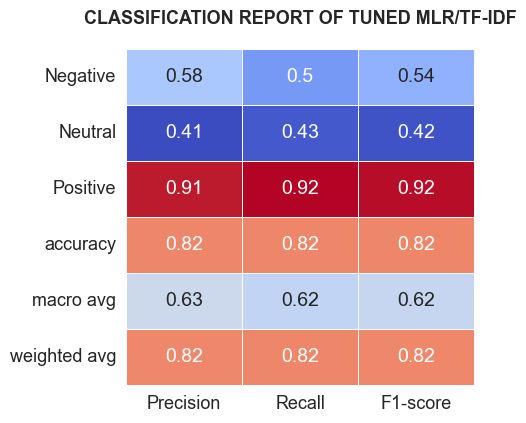

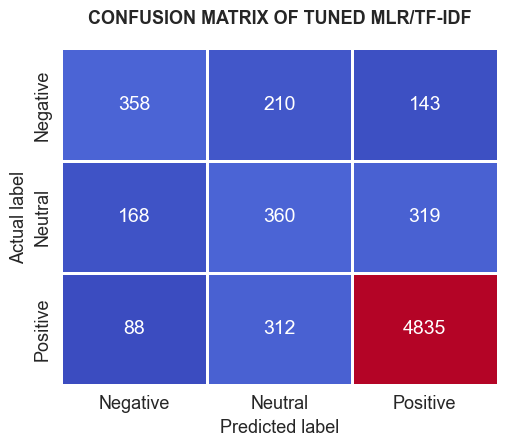

In [272]:
tuning_result("MLR/TF-IDF", mlr_tf2_pipe)

In [273]:
mlr_tf2_acc = accuracy_list[2]
mlr_tf2_f1 = f1_list[2]
mlr_tf2_precision = precision_list[2]
mlr_tf2_recall = recall_list[2]
print("MLR/TF: ", mlr_tf2_acc, mlr_tf2_f1, mlr_tf2_precision, mlr_tf2_recall)

MLR/TF:  0.8174591491240983 0.8160544784918788 0.8153509315726556 0.8174591491240983


### TUNED MLR - BoW


In [274]:
mlr_bow_pipe

Pipeline(steps=[('vec', CountVectorizer()), ('smote', SMOTE(random_state=42)),
                ('mlr',
                 LogisticRegression(max_iter=1000, multi_class='multinomial',
                                    random_state=42, solver='saga'))])

In [275]:
mlr_bow_params = {
    "vec__ngram_range": [(1, 1), (1, 2), (1, 3)],
    "mlr__C": [1.0, 0.1, 0.01],
    "mlr__penalty": ["l1", "l2"],
}

In [276]:
grid("MLR/BOW", mlr_bow_pipe, mlr_bow_params)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 1); total time=  25.3s
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 1); total time=  25.5s
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 1); total time=  26.0s
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 1); total time=  26.1s
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 1); total time=  34.9s
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 2); total time= 2.6min
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 2); total time= 2.7min
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 2); total time= 2.7min
[CV] END mlr__C=0.1, mlr__penalty=l2, vec__ngram_range=(1, 1); total time=  16.4s
[CV] END mlr__C=0.1, mlr__penalty=l2, vec__ngram_range=(1, 1); total time=  17.1s
[CV] END mlr__C=1.0, mlr__penalty=l2, vec__ngram_range=(1, 2); total time= 2.4min
[CV] END mlr__C=0.1, mlr__penalty=l2, 

,Rank,Hyperparameter,CV F1 score (mean)
2,1,"{'mlr__C': 0.1, 'mlr__penalty': 'l2', 'vec__ngram_range': (1, 1)}",0.773712
0,2,"{'mlr__C': 1.0, 'mlr__penalty': 'l2', 'vec__ngram_range': (1, 1)}",0.772263
3,3,"{'mlr__C': 0.1, 'mlr__penalty': 'l2', 'vec__ngram_range': (1, 2)}",0.771300
1,4,"{'mlr__C': 1.0, 'mlr__penalty': 'l2', 'vec__ngram_range': (1, 2)}",0.769443
4,5,"{'mlr__C': 0.01, 'mlr__penalty': 'l2', 'vec__ngram_range': (1, 1)}",0.757058
5,6,"{'mlr__C': 0.01, 'mlr__penalty': 'l2', 'vec__ngram_range': (1, 2)}",0.757020


/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


In [277]:
mlr_bow_best = best_list[3]
print("MLR/BOW: ", mlr_bow_best)

MLR/BOW:  {'mlr__C': 0.1, 'mlr__penalty': 'l2', 'vec__ngram_range': (1, 1)}


In [278]:
mlr_bow2_pipe = Pipeline(
    [
        ("vec", CountVectorizer(ngram_range=(1, 1))),
        ("smote", SMOTE(random_state=42)),
        (
            "mlr",
            LogisticRegression(
                multi_class="multinomial",
                solver="saga",
                random_state=42,
                max_iter=1000,
                C=0.1,
                penalty="l2",
            ),
        ),
    ]
)

Accuracy:  0.781687030766966 

F1:  0.7877697687176267 

Precision:  0.7948093092108283 

Recall:  0.781687030766966 

              precision    recall  f1-score   support

    Negative       0.51      0.51      0.51       711
     Neutral       0.34      0.40      0.36       847
    Positive       0.91      0.88      0.89      5235

    accuracy                           0.78      6793
   macro avg       0.58      0.60      0.59      6793
weighted avg       0.79      0.78      0.79      6793

[[ 363  211  137]
 [ 180  336  331]
 [ 169  455 4611]]


<Figure size 800x550 with 0 Axes>

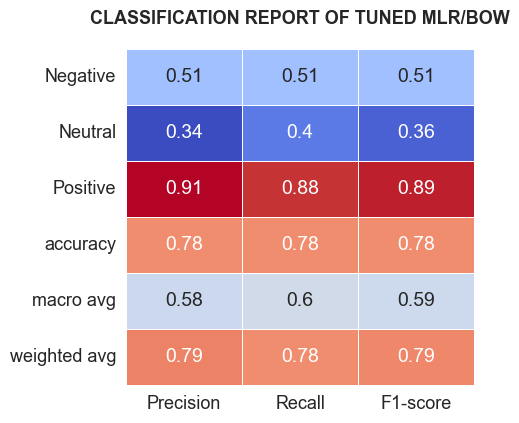

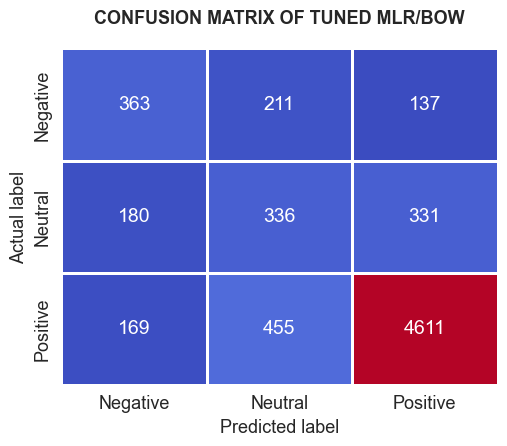

In [279]:
tuning_result("MLR/BOW", mlr_bow2_pipe)

In [280]:
mlr_bow2_acc = accuracy_list[3]
mlr_bow2_f1 = f1_list[3]
mlr_bow2_precision = precision_list[3]
mlr_bow2_recall = recall_list[3]
print("MLR/bow: ", mlr_bow2_acc, mlr_bow2_f1, mlr_bow2_precision, mlr_bow2_recall)

MLR/bow:  0.781687030766966 0.7877697687176267 0.7948093092108283 0.781687030766966


### Compare Tuned Supervised Models


In [281]:
compare_tuned = pd.DataFrame(
    {
        "Tuned Model": ["MLR/BOW", "MLR/TF-IDF", "MNB/BOW", "MNB/TF-IDF"],
        "Accuracy": [mlr_bow2_acc, mlr_tf2_acc, mnb_bow2_acc, mnb_tf2_acc],
        "F1_Score": [mlr_bow2_f1, mlr_tf2_f1, mnb_bow2_f1, mnb_tf2_f1],
        "Recall": [mlr_bow2_recall, mlr_tf2_recall, mnb_bow2_recall, mnb_tf2_recall],
        "Precision": [
            mlr_bow2_precision,
            mlr_tf2_precision,
            mnb_bow2_precision,
            mnb_tf2_precision,
        ],
    }
)

styles = [
    dict(selector="caption", props=[("font-size", "120%"), ("font-weight", "bold")])
]
compare_tuned = compare_tuned.style.set_caption(
    "TUNED SUPERVISED MODELS"
).set_table_styles(styles)

compare_tuned

,Tuned Model,Accuracy,F1_Score,Recall,Precision
0,MLR/BOW,0.781687,0.787770,0.781687,0.794809
1,MLR/TF-IDF,0.817459,0.816054,0.817459,0.815351
2,MNB/BOW,0.801413,0.804759,0.801413,0.809347
3,MNB/TF-IDF,0.796261,0.797071,0.796261,0.798373


In [181]:
dfi.export(compare_tuned, "compare_tuned.png", fontsize=16, dpi=400)

/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


### Evaluate on test set


In [282]:
train_idx, test_idx = train_test_split(
    np.array(range(len(df_ML1["Review"]))), test_size=0.3, random_state=42
)
test_idx

array([12888, 19134, 18051, ..., 21745,  4488,  5144])

In [298]:
df_ML1.head()

,Review,Rating,Class
0,absolutely wonderful silky sexy comfortable,4,Positive
1,love sooo pretty happened find store glad bc never would ordered online bc love hit little knee would definitely true midi someone truly,5,Positive
2,high hope really wanted work initially ordered small usual found outrageously small small fact could zip reordered medium wa ok overall half wa comfortable nicely half tight layer several somewhat cheap net layer imo major design flaw wa net layer sewn directly zipper c,3,Neutral
3,love love love fun flirty fabulous every time get nothing great compliment,5,Positive
4,flattering due adjustable front perfect legging pair well love,5,Positive


In [294]:
def evaluate_test(model):
    model_fit = model.fit(X_train, y_train)
    y_pred = model_fit.predict(X_test)
    predict_probas = model.predict_proba(X_test).max(axis=1)
    test_df = df_ML1.iloc[test_idx]
    test_df["Predicted Label"] = y_pred
    test_df["Predicted Confidence"] = predict_probas
    return test_df.head()

In [295]:
evaluate_test(mlr_tf2_pipe)

,Review,Rating,Class,Predicted Label,Predicted Confidence
13365,beautiful thick doe make boxy nicely flattering design gorgeous considering get regret iti normally small ordered small true perfect want slightly relaxed one,5,Positive,Positive,0.997419
19834,piece almost want tried version x felt little large though meant looser buttercup yellow behind lace pretty especially love part tank provides nice contrast allows detail stand navy also nice wa display next better person online like wa texture spandex back portion like,4,Positive,Negative,0.423398
18722,really like returning larger much tight upper arm somewhat tight chest overall like,4,Positive,Positive,0.665948
10635,perfect light weight relaxing summer soft light ha stretch think worn fitted way want show half body shape perfect one loose cover silhouette still feminine loose im lb usually gave perfect relaxed without losing feminine think could well would sn,5,Positive,Positive,0.997571
7348,nothing like picture super highwaisted longer picture felt wa wearing pair terribly thought going pair cropped wide leg far wa also much lighter shown picture super unflattering going back,2,Negative,Positive,0.974676


### Compare ALL Models


In [962]:
compare_all = pd.DataFrame(
    {
        "Model": [
            "VADER",
            "Tuned MLR/BOW",
            "Tuned MLR/TF-IDF",
            "Tuned MNB/BOW",
            "Tuned MNB/TF-IDF",
        ],
        "Accuracy": [
            vader_accuracy,
            tuned_mlr_bow_acc,
            tuned_mlr_tf_acc,
            tuned_nb_bow_acc,
            tuned_nb_tf_acc,
        ],
        "F1_Score": [
            vader_f1,
            tuned_mlr_bow_f1,
            tuned_mlr_tf_f1,
            tuned_nb_bow_f1,
            tuned_nb_tf_f1,
        ],
        "Recall": [
            vader_recall,
            tuned_mlr_bow_recall,
            tuned_mlr_tf_recall,
            tuned_nb_bow_recall,
            tuned_nb_tf_recall,
        ],
        "Precision": [
            vader_precision,
            tuned_mlr_bow_precision,
            tuned_mlr_tf_precision,
            tuned_nb_bow_precision,
            tuned_nb_tf_precision,
        ],
    }
)
compare_all

,Model,Accuracy,F1_Score,Recall,Precision
0,VADER,0.761715,0.739529,0.761715,0.725109
1,Tuned MLR/BOW,0.822906,0.807318,0.822906,0.797884
2,Tuned MLR/TF-IDF,0.821728,0.797210,0.821728,0.788082
3,Tuned MNB/BOW,0.818931,0.808301,0.818931,0.801869
4,Tuned MNB/TF-IDF,0.805241,0.765065,0.805241,0.762706


In [973]:
dfi.export(compare_all, "compare_all.png", fontsize=16, dpi=400)

/Applications/Google Chrome.app/Contents/MacOS/Google Chrome


In [190]:
color_name = {
    "VADER": "#edf8b1",
    "Tuned MLR/BOW": "#c7e9b4",
    "Tuned MLR/TF-IDF": "#7fcdbb",
    "Tuned MNB/BOW": "#41b6c4",
    "Tuned MNB/TF-IDF": "#1d91c0",
}

In [987]:
compare_acc = compare_all.sort_values(by="Accuracy", ascending=False)
fig = (
    px.bar(
        compare_acc,
        x="Accuracy",
        y="Model",
        color="Model",
        color_discrete_map=color_name,
        text_auto=True,
        width=600,
        height=300,
    )
    .update_traces(
        dict(marker_line_width=0.5, marker_line_color="black"),
        # textposition="outside",
        textfont_size=14,
    )
    .update_layout(
        template="simple_white",
        showlegend=False,
        title=dict(
            text="ACCURACY OF PROPOSED MODELS", font=dict(size=18), yref="paper", x=0.5
        ),
        xaxis_title=dict(font=dict(size=16)),
        yaxis_title=dict(font=dict(size=16)),
    )
    .update_xaxes(tickfont=dict(size=14))
    .update_yaxes(tickfont=dict(size=14))
)
fig.show()

In [986]:
compare_all = compare_all.sort_values(by="Recall", ascending=False)
fig = (
    px.bar(
        compare_all,
        x="Recall",
        y="Model",
        color="Model",
        color_discrete_map=color_name,
        # color_discrete_sequence =["#edf8b1","#c7e9b4","#7fcdbb","#41b6c4","#1d91c0"],
        text_auto=True,
        width=600,
        height=300,
    )
    .update_traces(
        dict(marker_line_width=0.5, marker_line_color="black"), textfont_size=14
    )
    .update_layout(
        coloraxis_showscale=False,
        showlegend=False,
        template="simple_white",
        title=dict(
            text="RECALL OF PROPOSED MODELS", font=dict(size=18), yref="paper", x=0.5
        ),
        xaxis_title=dict(font=dict(size=16)),
        yaxis_title=dict(font=dict(size=16)),
    )
    .update_xaxes(tickfont=dict(size=14))
    .update_yaxes(tickfont=dict(size=14))
)
fig.show()

In [985]:
compare_f1 = compare_all.sort_values(by="F1_Score", ascending=False)

fig = (
    px.bar(
        compare_f1,
        x="F1_Score",
        y="Model",
        color="Model",
        color_discrete_map=color_name,
        # color_discrete_sequence =["#edf8b1","#c7e9b4","#7fcdbb","#41b6c4","#1d91c0"],
        text_auto=True,
        width=600,
        height=300,
    )
    .update_traces(
        dict(marker_line_width=0.5, marker_line_color="black"), textfont_size=14
    )
    .update_layout(
        showlegend=False,
        template="simple_white",
        title=dict(
            text="F1-SCORE OF PROPOSED MODELS", font=dict(size=18), yref="paper", x=0.5
        ),
        xaxis_title=dict(font=dict(size=16)),
        yaxis_title=dict(font=dict(size=16)),
    )
    .update_xaxes(tickfont=dict(size=14))
    .update_yaxes(tickfont=dict(size=14))
)
fig.show()

In [983]:
compare_prec = compare_all.sort_values(by="Precision", ascending=False)
# fig = px.bar(compare_prec, x = "Precision", y = "Model", title = "Precision")
fig = (
    px.bar(
        compare_prec,
        x="Precision",
        y="Model",
        color="Model",
        color_discrete_map=color_name,
        # color_discrete_sequence =["#edf8b1","#c7e9b4","#7fcdbb","#41b6c4","#1d91c0"],
        text_auto=True,
        width=600,
        height=300,
    )
    .update_traces(
        dict(marker_line_width=0.5, marker_line_color="black"), textfont_size=14
    )
    .update_layout(
        showlegend=False,
        template="simple_white",
        title=dict(
            text="PRECISION OF PROPOSED MODELS", font=dict(size=18), yref="paper", x=0.5
        ),
        xaxis_title=dict(font=dict(size=16)),
        yaxis_title=dict(font=dict(size=16)),
    )
    .update_xaxes(tickfont=dict(size=14))
    .update_yaxes(tickfont=dict(size=14))
)
fig.show()